<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/innovaciones/blob/main/propuesta/reduccion_dim_clasificacion_regresion/0_intro_python/dia_8/.ipynb_checkpoints/dia_8-checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/innovaciones/blob/main/propuesta/reduccion_dim_clasificacion_regresion/0_intro_python/dia_8/.ipynb_checkpoints/dia_8-checkpoint.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Día 8: Cómo funcionan los modelos

[dia 8: How Models Work](https://www.kaggle.com/dansbecker/how-models-work?utm_medium=email&utm_source=gamma&utm_campaign=thirty-days-of-ml&utm_content=day-8)

## Objetivo:

* describir el funcionamiento general de los modelos de aprendizaje automático y cómo se utilizan.

## [Video de apoyo para esta sesión:](https://www.youtube.com/watch?v=t7yawjxfHG0&t=90s)

### Situación problemática 

Supongamos que tu primo ha ganado millones de dólares especulando con bienes raíces.

Se ha ofrecido a convertirse en socio comercial con usted debido a su interés en la ciencia de datos.

Él proporcionará el dinero y usted proporcionará modelos que predicen cuánto valen las distintas casas.

Le preguntas a tu primo cómo predijo los valores inmobiliarios en el pasado y dice que es solo intuición.

Pero más preguntas revelan que ha identificado patrones de precios de casas que ha visto en el pasado, y usa esos patrones para hacer predicciones para nuevas casas que está considerando.

El aprendizaje automático funciona de la misma manera.

Comenzaremos con un modelo llamado Árbol de decisiones.

Hay modelos más sofisticados que brindan predicciones más precisas.

Pero los árboles de decisión son fáciles de entender y son el bloque de construcción básico para algunos de los mejores modelos en ciencia de datos.

Para simplificar, comenzaremos con el árbol de decisiones más simple posible.

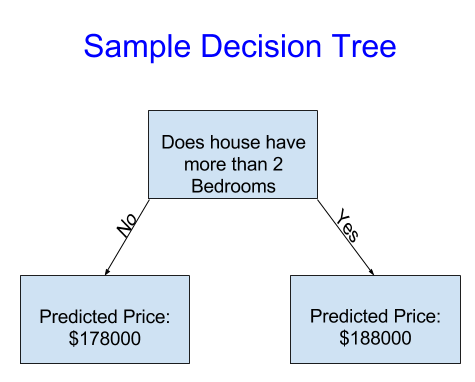

In [1]:
from IPython.display import Image
Image('fig_1.png', width = 400, height = 200) 

Divide las casas en solo dos categorías.

El precio previsto para cualquier casa considerada es el precio promedio histórico de las casas de la misma categoría.

Usamos datos para decidir cómo dividir las casas en **dos** grupos y luego nuevamente para determinar el precio previsto en cada grupo.

Este paso de capturar patrones a partir de datos se denomina **ajuste o entrenamiento del modelo**.

Los datos utilizados para ajustar el modelo se denominan datos de entrenamiento.

Los detalles de cómo se ajusta el modelo (por ejemplo, cómo dividir los datos) son lo suficientemente complejos como para guardarlos para más adelante.

Una vez que se ha ajustado el modelo, puede aplicarlo a nuevos datos para predecir los precios de viviendas adicionales.

## Mejoramiento del árbol de decisiones

¿Cuál de los siguientes dos árboles de decisiones es más probable que resulte del ajuste de los datos de capacitación inmobiliaria?

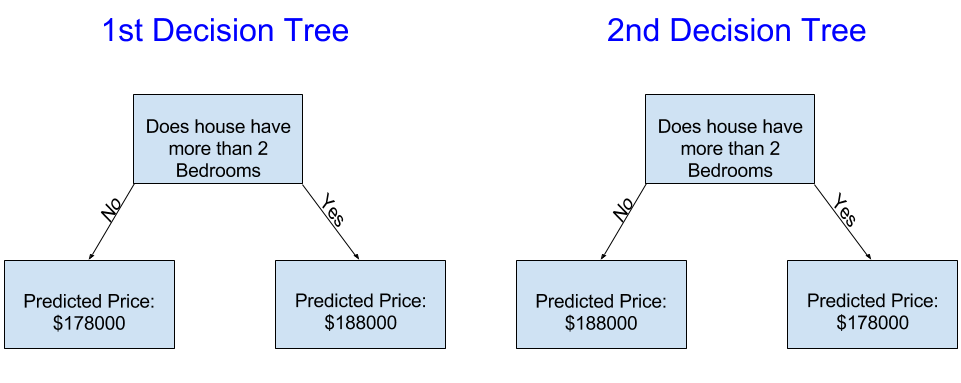

In [2]:
from IPython.display import Image
Image('fig_2.png', width = 800, height = 400) 

El árbol de decisiones de la izquierda (Árbol de decisiones 1) probablemente tenga más sentido, porque captura la realidad de que las casas con más dormitorios tienden a venderse a precios más altos que las casas con menos dormitorios.

La mayor deficiencia de este modelo es que no captura la mayoría de los factores que afectan el precio de la vivienda, como  
* la cantidad de baños,  
* el tamaño del lote,  
* la ubicación, etc.

Puede capturar más factores utilizando un árbol que tenga más "divisiones".

Estos se llaman árboles "más profundos".

Un árbol de decisiones que también considere el tamaño total del lote de cada casa podría verse así:

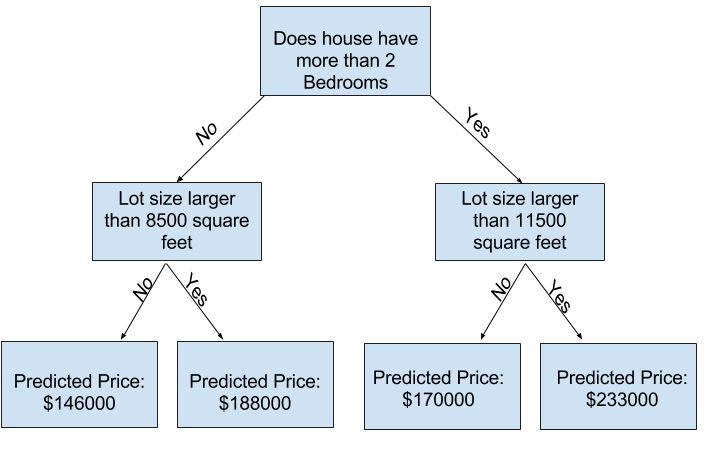

In [3]:
from IPython.display import Image
Image('fig_3.png', width = 800, height = 400) 

Puede predecir el precio de cualquier casa rastreando el árbol de decisiones, siempre eligiendo el camino correspondiente a las características de esa casa.

El precio previsto para la casa está en la parte inferior del árbol.

El punto en la parte inferior donde hacemos una predicción se llama hoja.

Las divisiones y los valores en las hojas serán determinados por los datos, por lo que es hora de que verifique los datos con los que trabajará.

### Continue

Seamos más específicos. 

Es hora de [Examinar tus datos](https://www.kaggle.com/dansbecker/basic-data-exploration).

## Exploración de datos básicos

### Uso de Pandas para familiarizarse con sus datos

El primer paso en cualquier proyecto de aprendizaje automático es familiarizarse con los datos.

Usarás la biblioteca de Pandas para esto.

Pandas es la herramienta principal que utilizan los científicos de datos para explorar y manipular datos.

La mayoría de la gente abrevia pandas en su código como pd. 

Hacemos esto con el comando

In [4]:
import pandas as pd

La parte más importante de la biblioteca Pandas es el DataFrame.

Un `DataFrame` contiene el tipo de datos que podría considerar una tabla.

Esto es similar a una hoja de Excel.

Pandas tiene métodos poderosos para la mayoría de las cosas que querrá hacer con este tipo de datos.

Como ejemplo, veremos los datos sobre los precios de las viviendas en Melbourne, Australia.

En los ejercicios prácticos, aplicará los mismos procesos a un nuevo conjunto de datos, que tiene precios de viviendas en Iowa.

* Cargamos y   
* exploramos los datos con los siguientes comandos:

guardar la ruta de archivo en la variable para facilitar el acceso

In [5]:
melbourne_data = pd.read_csv('melb_data.csv') 

In [6]:
melbourne_data.iloc[12:15,5:-1] 

,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
12,S,Biggin,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan
13,S,Biggin,13/08/2016,2.5,3067.0,2.0,1.0,1.0,195.0,NaN,NaN,Yarra,-37.8084,144.9973,Northern Metropolitan
14,SP,Greg,14/05/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8016,144.9988,Northern Metropolitan


In [7]:
melbourne_data.columns 

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## imprime un resumen de los datos en Melbourne data

In [8]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Interpretación de la descripción de datos

Los resultados muestran 8 números para cada columna en su conjunto de datos original.

El primer número, el recuento (`count`), muestra cuántas filas tienen valores no nulos.

Los valores perdidos surgen por muchas razones.

Por ejemplo, el tamaño de la segunda habitación no se recopilaría al inspeccionar una casa de una habitación.

El segundo valor es `mean`, que es el promedio.

Debajo de eso, `std` es la desviación estándar, que mide qué tan distribuidos numéricamente están los valores.

Para interpretar los valores `min`, `25%`, `50%`, `75%` y `max`, imagina ordenar cada columna de menor a mayor valor. El primer valor (el más pequeño) es `min`.

## Ejercicio de codificación de un modelo de ML

[primer ejercicio de codificación](https://www.kaggle.com/marcocanas/exercise-explore-your-data/edit)

### Objetivos:    
* leer un archivo de datos y   
* comprender las estadísticas sobre los datos.

En ejercicios posteriores, aplicará técnicas para 
* filtrar los datos,   
* crear un modelo de aprendizaje automático y  
* mejorar su modelo de forma iterativa.

Los ejemplos de cursos utilizan datos de Melbourne.

Para asegurarse de que puede aplicar estas técnicas por su cuenta, deberá aplicarlas a un nuevo conjunto de datos (con precios de la vivienda de Iowa).

Los ejercicios utilizan un entorno de codificación de `notebook`.

## Ejercicios

Ejecute la siguiente celda para configurar la verificación de código, que verificará su trabajo a medida que avanza.

## Paso 1: Carga de datos

Lea el archivo de datos de Iowa en un Pandas DataFrame llamado `home_data`

In [9]:
import pandas as pd
iowa_file_path = 'https://www.kaggle.com/c/home-data-for-ml-course/data/train.csv'
# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv('train.csv') 


In [10]:
home_data 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
home_describe = home_data.describe()
home_describe 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Paso 2: Revise los datos

Utilice el comando que aprendió para ver las estadísticas resumidas de los datos.

Luego, complete las variables para responder la siguiente pregunta

¿Cuál es el tamaño medio del lote (redondeado al número entero más cercano)?

A partir de hoy, ¿cuántos años tiene la casa más nueva (año actual: la fecha en que se construyó)?

# ¿Cuál es el tamaño de lote promedio (redondeado al número entero más cercano)?

In [12]:
avg_lot_size = int(home_describe.loc['mean','LotArea']) 
avg_lot_size 

10516

# A partir de hoy, cuántos años tiene la casa más nueva (año actual: la fecha en la que se construyó)

In [13]:
newest_home_age = 2021 - home_describe.loc['max', 'YearBuilt'] 
newest_home_age 

11.0

# Piense en sus datos

La casa más nueva en sus datos no es tan nueva. 

Algunas posibles explicaciones para esto:

1. No han construido nuevas casas donde se recopilaron estos datos.

2. Los datos se recopilaron hace mucho tiempo. Las casas construidas después de la publicación de datos no aparecerían.

Si la razón es la explicación $n^{o} \ 1$, ¿afecta eso su confianza en el modelo que construye con estos datos? ¿Y si es la razón $n^{o} \ 2$?

## [Seleccionar datos para modelar](https://www.kaggle.com/dansbecker/your-first-machine-learning-model)

Su conjunto de datos tenía demasiadas variables para entenderlo, o incluso para imprimirlo bien.

In [14]:
len(home_data.columns) 

81

¿Cómo puede reducir esta abrumadora cantidad de datos a algo que pueda comprender?

Comenzaremos eligiendo algunas variables usando nuestra intuición.

Los cursos posteriores le mostrarán técnicas como PCA (Análisis de componentes principales) para priorizar automáticamente las variables.

Para elegir variables / columnas, necesitaremos ver una lista de todas las columnas del conjunto de datos.

Eso se hace con el atributo `columns` para DataFrame.

In [15]:
import pandas as pd
melbourne_data = pd.read_csv('melb_data.csv')
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Los datos de Melbourne tienen algunos valores perdidos (algunas casas para las que no se registraron algunas variables).

Aprenderemos a manejar los valores perdidos en un tutorial posterior.

Sus datos de Iowa no tienen valores perdidos en las columnas que usa.

Por lo tanto, tomaremos la opción más simple por ahora y eliminaremos las casas de nuestros datos.

No se preocupe mucho por esto por ahora, aunque el código es:

`dropna` elimina los valores faltantes (piense en `na` como "no disponible" (`not available`))

In [16]:

melbourne_data = melbourne_data.dropna(axis = 0)

## Selección de los subconjuntos de datos (X, y)

Hay muchas formas de seleccionar un subconjunto de sus datos.

El curso Pandas los cubre con más profundidad, pero nos centraremos en dos enfoques por ahora.

1. Notación de puntos, que usamos para seleccionar el "objetivo de predicción"
2. Seleccionar con una lista de columnas, que usamos para seleccionar las "características"

## Selección del objetivo de predicción

Puede extraer una variable con notación de puntos.

Esta única columna se almacena en una serie de Pandas, que en general es como un DataFrame con una única columna de datos.

Usaremos la notación de puntos para seleccionar la columna que queremos predecir, que se llama objetivo de predicción.

Por convención, el objetivo de predicción se llama `y`. 

Entonces, el código que necesitamos para guardar los precios de la vivienda en los datos de Melbourne es: 

In [17]:
y = melbourne_data.Price
type(y)  

pandas.core.series.Series

## Elegir "atributos o características"

Las columnas que se ingresan en nuestro modelo (y luego se usan para hacer predicciones) se llaman "características".

En nuestro caso, esas serían las columnas utilizadas para determinar el precio de la vivienda.

A veces, utilizará todas las columnas excepto la columna objetivo, como características.

Otras veces, estará mejor con menos características.

Por ahora, crearemos un modelo con solo algunas características.

Más adelante verá cómo iterar y comparar modelos creados con diferentes características.

Seleccionamos múltiples características proporcionando una lista de nombres de columnas entre corchetes.

Cada elemento de esa lista debe ser una cadena (con comillas).

Aquí hay un ejemplo:

In [18]:
melbourne_caracteristicas = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

Por convención, estos datos se denominan `X`.

In [19]:
X = melbourne_data[melbourne_caracteristicas]
X 

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.80790,144.99340
2,3,2.0,134.0,-37.80930,144.99440
4,4,1.0,120.0,-37.80720,144.99410
6,3,2.0,245.0,-37.80240,144.99930
7,2,1.0,256.0,-37.80600,144.99540
...,...,...,...,...,...
12205,3,2.0,972.0,-37.51232,145.13282
12206,3,1.0,179.0,-37.86558,144.90474
12207,1,1.0,0.0,-37.85588,144.89936
12209,2,1.0,0.0,-37.85581,144.99025


Repasemos rápidamente los datos que usaremos para predecir los precios de la vivienda utilizando el método `describe` y el método `head`, que muestra las primeras filas.

In [20]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [21]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


La verificación visual de sus datos con estos comandos es una parte importante del trabajo de un científico de datos.

Con frecuencia encontrará sorpresas en el conjunto de datos que merecen una inspección más detallada.

## Construyendo su modelo

Utilizará la biblioteca `scikit-learn` para crear sus modelos.

Al codificar, esta biblioteca se escribe como `sklearn`, como verá en el código de muestra.

`Scikit-learn` es fácilmente la biblioteca más popular para modelar los tipos de datos que normalmente se almacenan en `DataFrames`.

Los pasos para **construir** y usar un **modelo** son:

* **Definir**: ¿Qué tipo de modelo será? ¿Un árbol de decisiones? ¿Algún otro tipo de modelo? También se especifican algunos otros parámetros del tipo de modelo.

* **Ajustar**: captura patrones a partir de los datos proporcionados.

Este es el corazón del modelaje.

* **Predecir:** Exactamente como suena

* **Evaluar**: determina la precisión de las predicciones del modelo.

A continuación se muestra un ejemplo de cómo definir un modelo de árbol de decisión con `scikit-learn` y ajustarlo a las características y la variable de destino.

In [22]:
from sklearn.tree import DecisionTreeRegressor

## Definir modelo. Especifique un número para `random_state` para garantizar los mismos resultados en cada ejecución.

In [23]:
melbourne_model = DecisionTreeRegressor(random_state=1)

## Ajuste del Modelo 

In [24]:
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Ahora tenemos un modelo ajustado que podemos usar para hacer predicciones.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. 

But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [25]:
print("Cálculo de la predicción de precios para las primeras cinco casas: ")
print(X.head())
print("La predicción es: ")
print(melbourne_model.predict(X.head()))
print(y[:5]) 

Cálculo de la predicción de precios para las primeras cinco casas: 
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
La predicción es: 
[1035000. 1465000. 1600000. 1876000. 1636000.]
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


In [26]:
prediccion = melbourne_model.predict(X.head()).reshape(-1,1)
type(prediccion), prediccion.ndim, prediccion  

(numpy.ndarray, 2, array([[1035000.],
        [1465000.],
        [1600000.],
        [1876000.],
        [1636000.]]))

In [27]:
prediction_df = pd.DataFrame(prediccion, index= y[:5].index) 

## Evaluación del modelo

In [28]:
 y.iloc[:5].values.reshape(-1,1) 

array([[1035000.],
       [1465000.],
       [1600000.],
       [1876000.],
       [1636000.]])

In [29]:
type(y) 

pandas.core.series.Series

In [30]:
from sklearn.metrics import mean_squared_error
melbourne_mae = mean_squared_error(prediccion, y.iloc[:5].values.reshape(-1,1)) 
melbourne_mae 

0.0

## Ejercicio 2 de creación de modelos 

Pruébelo usted mismo en el [Ejercicio de creación de modelos](https://www.kaggle.com/marcocanas/exercise-your-first-machine-learning-model/edit)

In [31]:
# Code you have previously used to load data
import pandas as pd

iowa_file_path = 'train.csv'

home_data = pd.read_csv(iowa_file_path)

## Paso 1: Especifique el objetivo de la predicción

Seleccione la variable objetivo, que corresponde al precio de venta (`Sales Price`).

Guarde esto en una nueva variable llamada `y`.

Deberá imprimir una lista de las columnas para encontrar el nombre de la columna que necesita.

imprima la lista de columnas en el conjunto de datos para encontrar el nombre del objetivo de predicción

In [32]:
home_data.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
y = home_data.SalePrice

## Paso 2: Crea `X`

Ahora creará un DataFrame llamado `X` que contiene las características predictivas.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

Utilizará solo las siguientes columnas en la lista (puede copiar y pegar la lista completa para guardar algo de escritura, aunque aún deberá agregar comillas):
* `LotArea`  
* `Año de construcción`
* `1stFlrSF`  
* `2ndFlrSF`
* `FullBath`  
* `BedroomAbvGr`
* `TotRmsAbvGrd`

Una vez que haya creado esa lista de características, úsela para crear el DataFrame que usará para adaptarse al modelo.

In [34]:
# Create the list of features below
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF',
                 'FullBath','BedroomAbvGr','TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names] 


## Revisar datos

Antes de construir un modelo, eche un vistazo rápido a `X` para verificar que se vea sensato

### Revisar datos

In [35]:
X 

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


### imprimir descripción o estadísticas de X

In [36]:
X.describe() 

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


### imprime las primeras líneas

In [37]:
X.head() 

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


## Paso 3: Especifique y ajuste el modelo

Create a `DecisionTreeRegressor` and save it `iowa_model`. 

Ensure you've done the relevant import from `sklearn` to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

In [38]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=0)

# Fit the model
iowa_model.fit(X,y) 


DecisionTreeRegressor(random_state=0)

## Paso 4: Haz predicciones

Haga predicciones con el comando de predicción del modelo utilizando `X` como datos.

Guarde los resultados en una variable llamada predicciones.

In [39]:
predictions = iowa_model.predict(X) 
print(predictions)


[208500. 181500. 223500. ... 266500. 142125. 147500.]


## Piense en sus resultados

Utilice el método `head` para comparar las primeras predicciones con los valores reales de las casas (en `y`) para esas mismas casas. ¿Algo sorprendente?

In [40]:
print(y[:5], predictions[:5]) 

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64 [208500. 181500. 223500. 140000. 250000.]


Es natural preguntar qué tan precisas serán las predicciones del modelo y cómo se puede mejorar.

Ese será tu próximo paso.

## Sigue adelante

Ya está listo para la [Validación del modelo](https://www.kaggle.com/dansbecker/model-validation).

# Modelo de validación

Ha construido un modelo. ¿Pero qué tan bueno es?

En esta lección, aprenderá a usar la validación del modelo para medir la calidad de su modelo.

Medir la calidad del modelo es la clave para mejorar sus modelos de forma iterativa.